# Task 1

In [1]:
!pip3 install numpy matplotlib pandas scikit-learn==1.5.2 seaborn

0.916083916083916
If depth=1, score is 0.8811188811188811


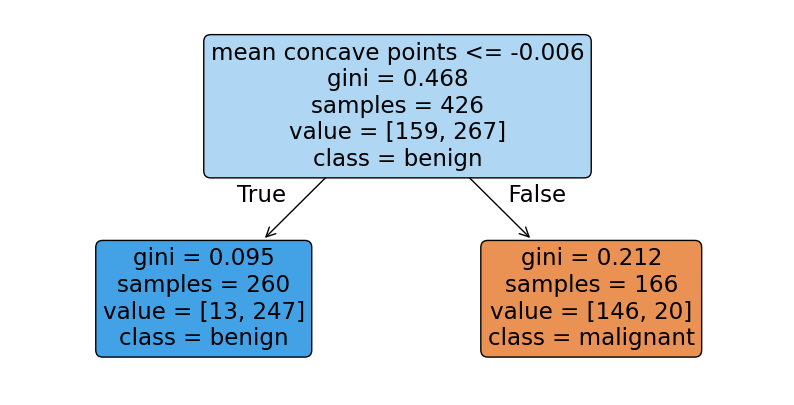

If depth=2, score is 0.9370629370629371


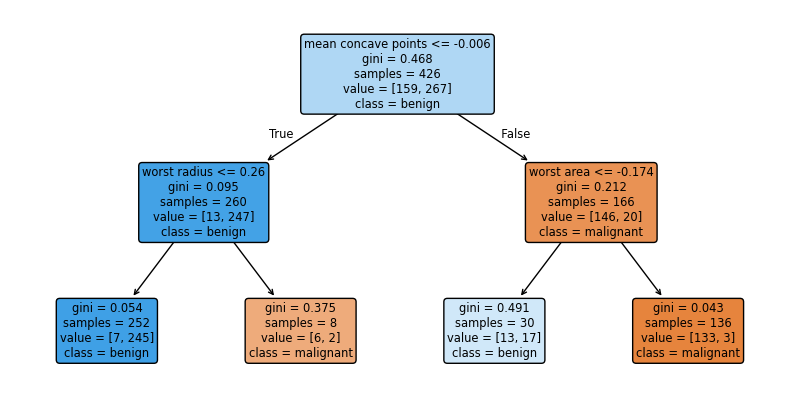

If depth=3, score is 0.9090909090909091


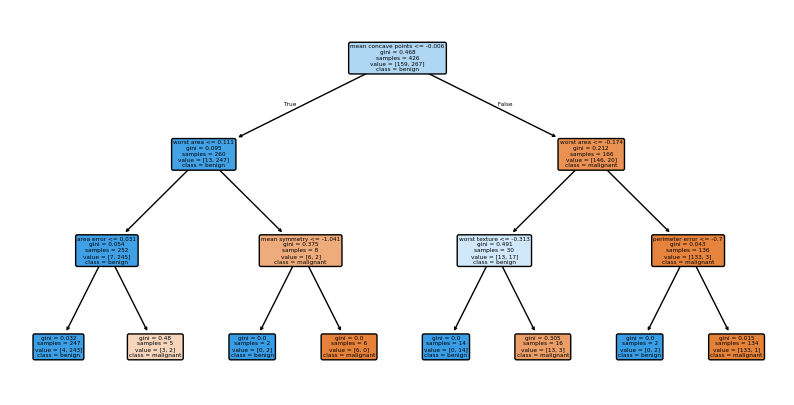

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.tree import plot_tree



data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Dataset Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Normalization
X_train = (X_train - X_train.mean()) / X_train.std()
X_test = (X_test - X_test.mean()) / X_test.std()

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

# Training Process
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
print(tree.score(X_test, y_test))

# Try different parameter settings.
# Try different depth.
n_set = 3
scores = []
for depth_i in range(1, n_set+1):
  clf_t = DecisionTreeClassifier(max_depth=depth_i)
  clf_t.fit(X_train, y_train)
  score_t = clf_t.score(X_test, y_test)
  scores.append(score_t)
  print(f"If depth={depth_i}, score is {score_t}")
  plt.figure(figsize=(10,5)) # Adjust figure size as needed
  plot_tree(clf_t, filled=True, feature_names=data.feature_names, class_names=['malignant', 'benign'], rounded=True)
  plt.show()



## Task 1.1
As the tree depth increases, its complexity grows, allowing it to capture intricate patterns and potentially improve training accuracy. However, excessive depth can lead to overfitting, making the model less generalizable. Shallow trees are simpler and more general but may sacrifice accuracy.

## Task 1.2

Sensitivity analysis examines how variations in input parameters of a model influence its output, thereby assessing the robustness of the model's conclusions. This process identifies which inputs significantly impact the output and helps prioritize areas for further research or data collection.
BMC MEDICAL RESEARCH METHODOLOGY

There are several methods to perform sensitivity analysis:

One-at-a-Time (OAT) Analysis: This method involves changing one input variable at a time while keeping others constant to observe the effect on the output. Although straightforward, OAT does not account for interactions between variables and may miss combined effects.
WIKIPEDIA

Variance-Based Methods: These approaches decompose the output variance to attribute portions to different inputs, including their interactions. Techniques like Sobol' indices fall under this category and are effective for models with nonlinear responses.
WIKIPEDIA

Regression Analysis: By fitting a regression model to the input-output data, one can assess the sensitivity of outputs to inputs. Standardized regression coefficients indicate the relative importance of each input variable. This method assumes a linear relationship between inputs and outputs.
WIKIPEDIA

Fourier Amplitude Sensitivity Test (FAST): FAST uses Fourier series to represent the model and analyzes the output's sensitivity to inputs across different frequencies. This method is efficient for handling models with multiple inputs.

Citation: https://en.wikipedia.org/wiki/Sensitivity_analysis

### Sensitivity Analysis

                Feature  Importance
26      worst concavity    0.140559
23           worst area    0.136364
10         radius error    0.076923
13           area error    0.063636
21        worst texture    0.050350
7   mean concave points    0.047552
1          mean texture    0.037063
25    worst compactness    0.034266
8         mean symmetry    0.004196
22      worst perimeter    0.000000


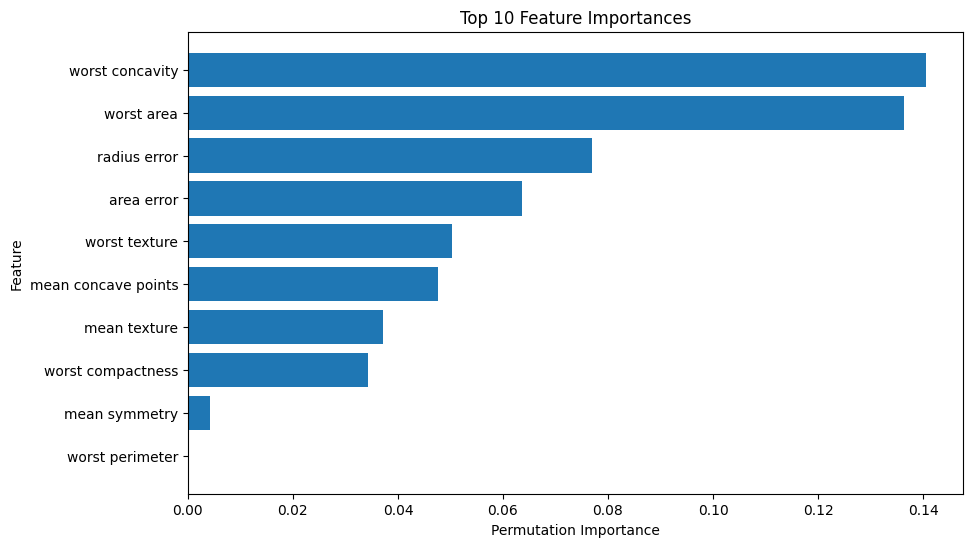

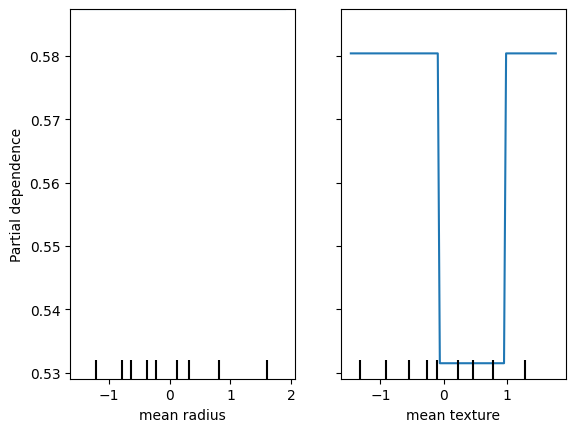

In [3]:

import pandas as pd
from sklearn.inspection import permutation_importance

# Calculate permutation importance for multiple features
result = permutation_importance(tree, X_test, y_test, n_repeats=10, random_state=0)

# Create a DataFrame for easier visualization
importance_df = pd.DataFrame({
    'Feature': data.feature_names,
    'Importance': result.importances_mean
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the results
print(importance_df.head(10))  # Show the top 10 features

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10])
plt.xlabel("Permutation Importance")
plt.ylabel("Feature")
plt.title("Top 10 Feature Importances")
plt.gca().invert_yaxis() # Invert y-axis to show the most important features at the top
plt.show()


from sklearn.inspection import PartialDependenceDisplay

features = ['mean radius', 'mean texture']

# Calculate and display the partial dependence plots
PartialDependenceDisplay.from_estimator(
    tree, X_test, features=features, kind="average",
    subsample=50, n_jobs=3, random_state=0,
    feature_names=data.feature_names
)
plt.show()


# Task 2

## Task 2.1

In [4]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from numpy import mean, std
import xgboost as xgb

# Bagging
model_bag = BaggingClassifier(n_estimators=10)

for nsplit in [2, 4, 6]:
  cvk = RepeatedStratifiedKFold(n_splits=nsplit, n_repeats=3, random_state=0)
  bag_cv_scores = cross_val_score(model_bag, X, y, scoring='accuracy', cv=cvk, n_jobs=-1, error_score='raise')
  print(f'For folds {nsplit}, Bagging Accuracy: %.3f (%.3f)' % (mean(bag_cv_scores), std(bag_cv_scores)))


# Boosting
model_xgb = xgb.XGBClassifier(objective="binary:logistic", random_state=0)
for nsplit in [2, 4, 6]:
  cvk = RepeatedStratifiedKFold(n_splits=nsplit, n_repeats=3, random_state=0)
  boost_cv_scores = cross_val_score(model_xgb, X, y, scoring='accuracy', cv=cvk, n_jobs=-1, error_score='raise')
  print(f'For folds {nsplit}, XGBoost Accuracy: %.3f (%.3f)' % (mean(boost_cv_scores), std(boost_cv_scores)))


For folds 2, Bagging Accuracy: 0.940 (0.011)
For folds 4, Bagging Accuracy: 0.944 (0.027)
For folds 6, Bagging Accuracy: 0.954 (0.022)
For folds 2, XGBoost Accuracy: 0.956 (0.003)
For folds 4, XGBoost Accuracy: 0.967 (0.016)
For folds 6, XGBoost Accuracy: 0.968 (0.015)


The larger the folds, the better the results may be due to the larger training dataset.

## Task 2.2

In [5]:
from sklearn.metrics import precision_score, recall_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Decision Tree
model_tree = DecisionTreeClassifier()
model_tree.fit(X_train, y_train)
tree_pred = model_tree.predict(X_test)
model_tree.score(X_test, y_test)


# Bagging
model_bag = BaggingClassifier(n_estimators=10)

model_bag.fit(X_train, y_train)
bag_pred = model_bag.predict(X_test)
model_bag.score(X_test, y_test)

# Boosting
model_xgb = xgb.XGBClassifier(objective="binary:logistic", random_state=0)
model_xgb.fit(X_train, y_train)
xgb_pred = model_xgb.predict(X_test)
model_xgb.score(X_test, y_test)

print("============Accuracy Metric==============")
print("Accuracy of bagging classifier: ", model_bag.score(X_test, y_test))
print("Accuracy of XG boosting classifier: ", model_xgb.score(X_test, y_test))

print("============Precision Metric==============")
print("Precision of bagging classifier: ",  precision_score(bag_pred, y_test))
print("Preicison of XG boosting classifier: ",  precision_score(xgb_pred, y_test))

print("============Recall Metric==============")
print("Recall of bagging classifier: ",  recall_score(bag_pred, y_test))
print("Recall of XG boosting classifier: ",  precision_score(xgb_pred, y_test))

============Accuracy Metric==============
Accuracy of bagging classifier:  0.9370629370629371
Accuracy of XG boosting classifier:  0.972027972027972
============Precision Metric==============
Precision of bagging classifier:  0.9111111111111111
Preicison of XG boosting classifier:  0.9666666666666667
============Recall Metric==============
Recall of bagging classifier:  0.9879518072289156
Recall of XG boosting classifier:  0.9666666666666667


## Task 2.3
Yes, the ranking changes based on the metric used. While XGBoost has higher accuracy and precision, Bagging has a slightly higher recall. This happens because different metrics emphasize different aspects of model performance—accuracy and precision focus on correct predictions, while recall prioritizes capturing all positive cases.
Higher precision means fewer false positives, which can lead to lower recall (more false negatives).
Higher recall means fewer false negatives, which can lower precision (more false positives).

# Task 3

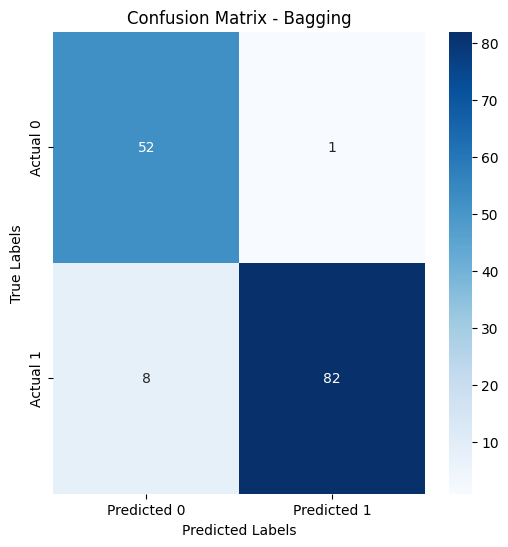

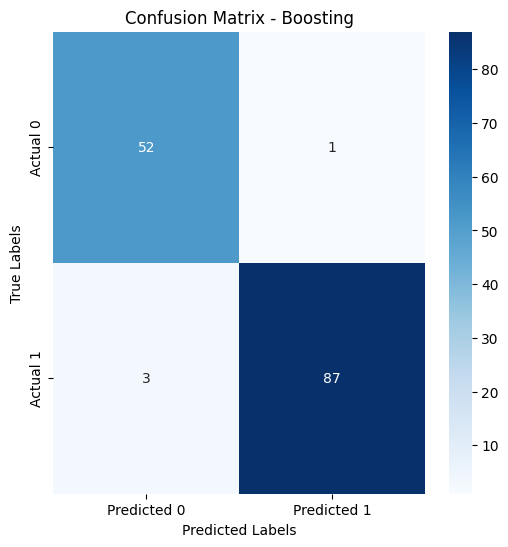

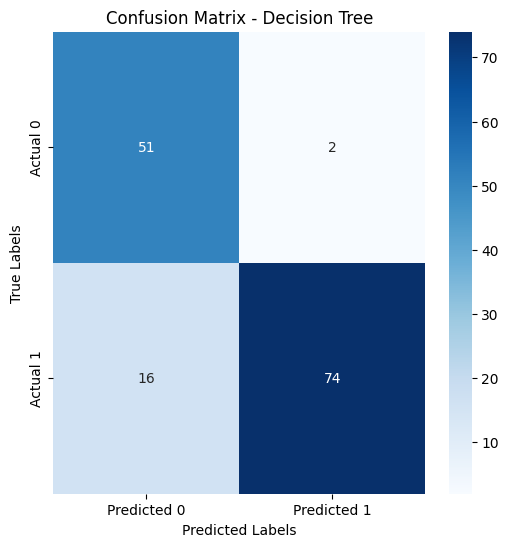

Paired t-test results: t-statistic=-3.051874467459397, p-value=0.007210262537213647


In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from scipy.stats import ttest_rel

# Confusion Matrix for Bagging
cm_bagging = confusion_matrix(y_test, bag_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm_bagging, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix - Bagging")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Confusion Matrix for Boosting
cm_boosting = confusion_matrix(y_test, xgb_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm_boosting, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix - Boosting")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Confusion Matrix for Tree
cm_tree = confusion_matrix(y_test, tree_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm_tree, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


# Statistical Test (Paired t-test)
t_statistic, p_value = ttest_rel(bag_cv_scores, boost_cv_scores)
print(f"Paired t-test results: t-statistic={t_statistic}, p-value={p_value}")


## Task 3.3
Decision Tree:  High variance, low bias (especially deep trees), overfits easily.

Bagging: Reduces variance of decision trees by averaging multiple trees, still low bias.

XGBoost:  Low bias, can have lower variance than Bagging due to boosting's sequential training and regularization, less prone to overfitting.

Bias-variance tradeoff analysis must consider multiple runs of each model with different data samples (like cross validation) for a more reliable assessment.

# Task 4

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import xgboost as xgb

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Hyper parameter search space
param_grid = {
    'max_depth': [2, 3, 4],
    'n_estimators': [10, 30, 50, 70],
    'learning_rate': [0.0001, 0.001, 0.1]
}

xgb = xgb.XGBClassifier(objective="binary:logistic", random_state=0)

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.0001, 0.001, 0.1],
                         'max_depth': [2, 3, 4],
                         'n_estimators': [10, 30, 50, 70]},
             scoring='accuracy')

In [11]:
# Get results from grid search
cv_results = grid_search.cv_results_

# Create a DataFrame to display all hyperparameters and their mean test scores
results_df = pd.DataFrame({
    'max_depth': cv_results['param_max_depth'].data,
    'n_estimators': cv_results['param_n_estimators'].data,
    'learning_rate': cv_results['param_learning_rate'].data,
    'mean_test_score': cv_results['mean_test_score'],
    'std_test_score': cv_results['std_test_score'],
    'rank_test_score': cv_results['rank_test_score']
})

# Sort results by best rank
results_df = results_df.sort_values(by='rank_test_score')
print(results_df)

    max_depth  n_estimators  learning_rate  mean_test_score  std_test_score  \
35          4            70         0.1000         0.957756        0.011957   
30          3            50         0.1000         0.957756        0.011957   
34          4            50         0.1000         0.957756        0.011957   
26          2            50         0.1000         0.955431        0.013581   
27          2            70         0.1000         0.955404        0.008777   
31          3            70         0.1000         0.950698        0.008836   
29          3            30         0.1000         0.948399        0.009083   
33          4            30         0.1000         0.946074        0.015621   
25          2            30         0.1000         0.946047        0.013929   
32          4            10         0.1000         0.943748        0.019834   
28          3            10         0.1000         0.934337        0.015572   
24          2            10         0.1000         0

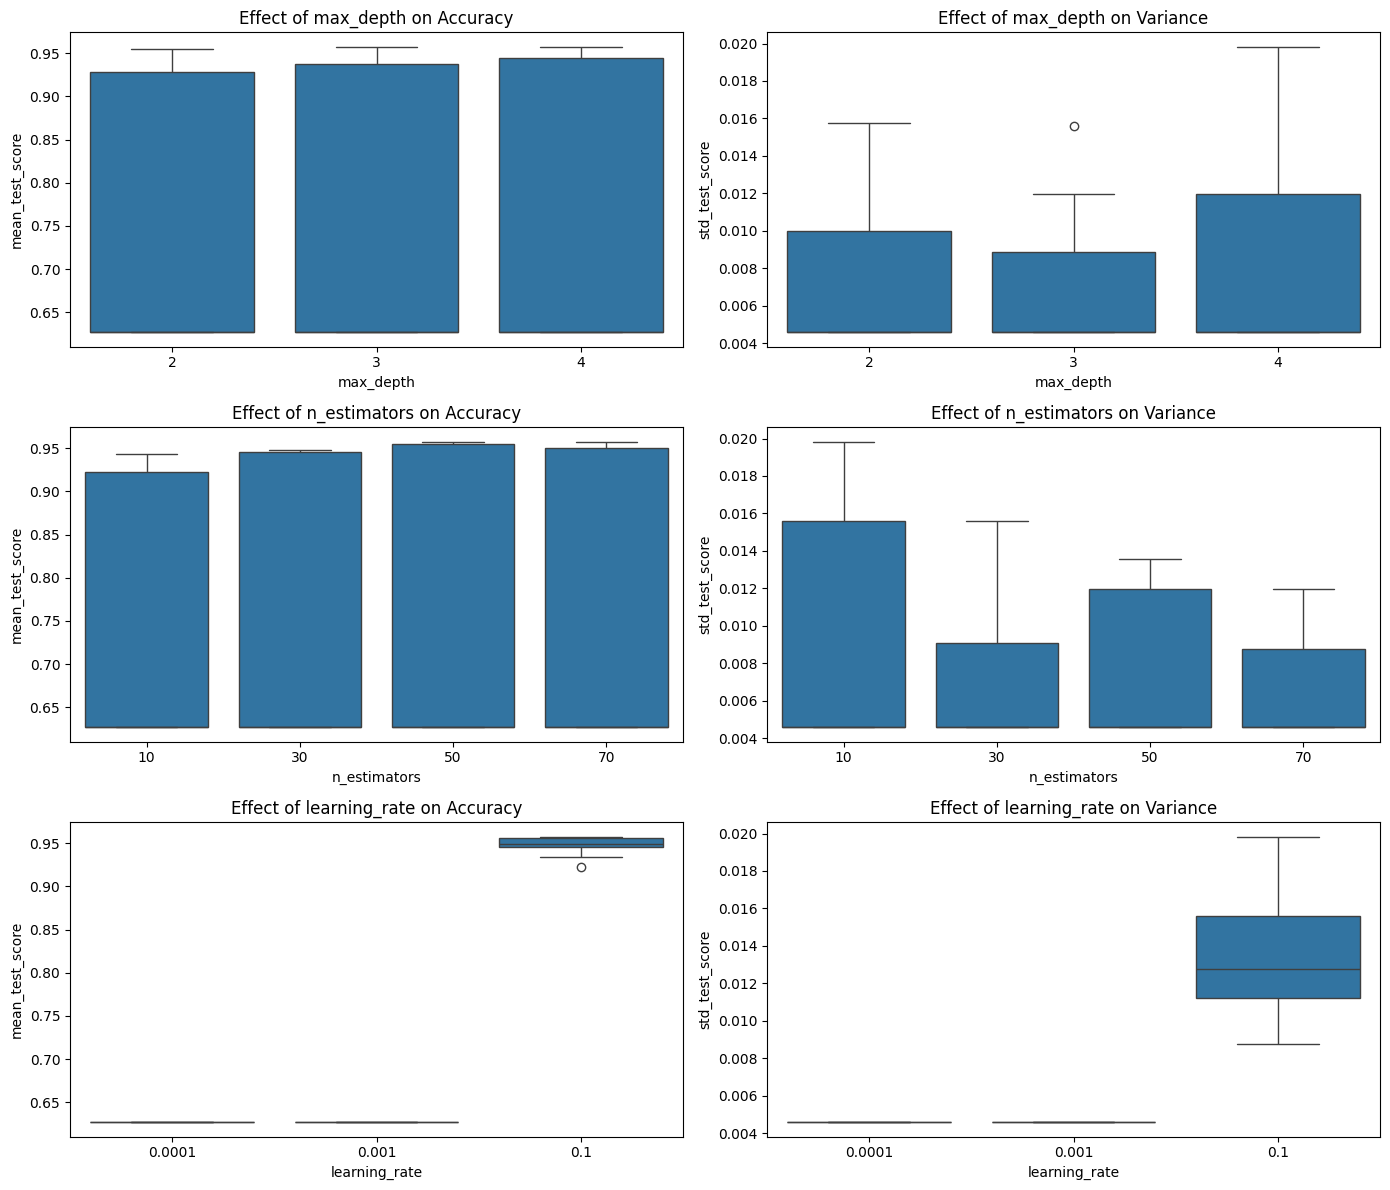

In [12]:
df = results_df

fig, axes = plt.subplots(3, 2, figsize=(14, 12))
sns.set_style("whitegrid")

# max_depth vs mean_test_score
sns.boxplot(x=df["max_depth"], y=df["mean_test_score"], ax=axes[0, 0])
axes[0, 0].set_title("Effect of max_depth on Accuracy")

# max_depth vs std_test_score
sns.boxplot(x=df["max_depth"], y=df["std_test_score"], ax=axes[0, 1])
axes[0, 1].set_title("Effect of max_depth on Variance")

# n_estimators vs mean_test_score
sns.boxplot(x=df["n_estimators"], y=df["mean_test_score"], ax=axes[1, 0])
axes[1, 0].set_title("Effect of n_estimators on Accuracy")

# n_estimators vs std_test_score
sns.boxplot(x=df["n_estimators"], y=df["std_test_score"], ax=axes[1, 1])
axes[1, 1].set_title("Effect of n_estimators on Variance")

# learning_rate vs mean_test_score
sns.boxplot(x=df["learning_rate"], y=df["mean_test_score"], ax=axes[2, 0])
axes[2, 0].set_title("Effect of learning_rate on Accuracy")

# learning_rate vs std_test_score
sns.boxplot(x=df["learning_rate"], y=df["std_test_score"], ax=axes[2, 1])
axes[2, 1].set_title("Effect of learning_rate on Variance")

plt.tight_layout()
plt.show()

Max Depth:

Increasing max_depth generally improves accuracy but also increases variance.
Shallower trees (lower max_depth) perform worse.

Number of Estimators (n_estimators):

Higher values improve accuracy up to a certain point, beyond which returns diminish.
More estimators reduce variance, making the model more stable.

Learning Rate (learning_rate):

A higher learning rate (0.1) leads to better performance, while lower values (0.001, 0.0001) drastically degrade accuracy.
Lower learning rates show more stable results but at significantly reduced accuracy.
This suggests the model is highly sensitive to the learning rate, followed by max depth and the number of estimators.